# Задача
одна из проблем, которую мы видим при обращении в саппорт - в разрезе разных категорий обращения необходимо смотреть в разные сервисы и собирать дополнительную информацию. На это уходит много времени. на одно обращение уходит в среднем 2 минуты поиска дополнительной информации. Стоимость часа работы сотрудника 6$.

Давайте поможем и оптимизируем время и деньги компании - сделаем модель,которая в зависимости от текста будет определять категорию обращения автоматически.

Тогда мы сможем сразу подготавливать информацию для наших операторов в течение 5 секунд (сбор и передача на фронт)

Нужно сделать модель многоклассовой классификации определения категории обращения

# загружаем данные

In [ ]:
!pip install googletrans

     |████████████████████████████████| 61kB 2.8MB/s 
     |████████████████████████████████| 51kB 4.8MB/s 
     |████████████████████████████████| 952kB 8.8MB/s 
     |████████████████████████████████| 71kB 7.7MB/s 
     |████████████████████████████████| 61kB 7.3MB/s 
     |████████████████████████████████| 102kB 9.5MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-cp36-none-any.whl size=15736 sha256=f9dd882f3aaa022784c81b6073b061cdfa396b913313e3a91ea39b7f8b8c3899
  Stored in directory: /root/.cache/pip/wheels/28/1a/a7/eaf4d7a3417a0c65796c547cff4deb6d79c7d14c2abd29273e
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=323f7ee9022da93348146b188a18df99ac864179d1373ebdfa394b1eb669099a
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built googletrans contextvars


In [ ]:
from googletrans import Translator
translator = Translator()
translator.translate('안녕하세요.').text

'Hello.'

In [ ]:
!pip install sumy
!pip install stop_words

     |████████████████████████████████| 92kB 2.3MB/s 
     |████████████████████████████████| 10.1MB 8.8MB/s 
  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746863 sha256=b60deabc6bbbd96bec2cf0485829db009fa3855b36c2453add05b9c3ae66a3f1
  Stored in directory: /root/.cache/pip/wheels/33/4e/a6/be297e6b83567e537bed9df4a93f8590ec01c1acfbcd405348
  Created wheel for breadability: filename=breadability-0.1.20-py2.py3-none-any.whl size=21684 sha256=96472c02f49bb88c7ff4ec632b49491c6a5f1bb86ca908bf18de4f24050472fb
  Stored in directory: /root/.cache/pip/wheels/5a/4d/a1/510b12c5e65e0b2b3ce539b2af66da0fc57571e528924f4a52
Successfully built pycountry breadability
  Created wheel for stop-words: filename=stop_words-2018.7.23-cp36-none-any.whl size=32917 sha256=4956680051ca4fbcdd938744b34bcf0e86edb7430b5aea132e41451cd69fea38
  Stored in directory: /root/.cache/pip/wheels/75/37/6a/2b295e03bd07290f0da95c3adb9a74ba95fbc333aa8b0c7c78
Successfully built stop-words


In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer

import datetime
import requests
import collections as co
import string
import re

import nltk
from sumy.utils import get_stop_words as gsw1
from stop_words import get_stop_words as gsw2


import pandas as pd
import numpy as np

In [ ]:
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('names')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Unzipping corpora/names.zip.


True

In [ ]:

from io import StringIO

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/xsolla_data/3categories_50.csv')
df

,channel,category,message
0,chat,afs,\nChat transcript:\nVisitor: I am attempting t...
1,chat,other,\nChat transcript:\nVisitor: Hi. For some reas...
2,chat,afs,"\nChat transcript:\nVisitor: Здравствуйте, я х..."
3,chat,afs,\nChat transcript:\nVisitor: no puedo hacer la...
4,chat,afs,\nChat transcript:\nVisitor: hi im trying to b...
...,...,...,...
49995,chat,afs,\nChat transcript:\nVisitor: Trying to make a ...
49996,chat,afs,\nChat transcript:\nVisitor: Добрый день! Не п...
49997,chat,other,\nChat transcript:\nVisitor: Hi\nI want do a s...
49998,chat,afs,"\nChat transcript:\nVisitor: Провел оплату, но..."


In [ ]:
df.head(5)

,channel,category,message
0,chat,afs,\nChat transcript:\nVisitor: I am attempting t...
1,chat,other,\nChat transcript:\nVisitor: Hi. For some reas...
2,chat,afs,"\nChat transcript:\nVisitor: Здравствуйте, я х..."
3,chat,afs,\nChat transcript:\nVisitor: no puedo hacer la...
4,chat,afs,\nChat transcript:\nVisitor: hi im trying to b...


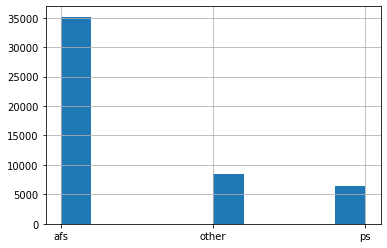

In [ ]:
df['category'].hist()

In [ ]:
# !pip install langdetect

     |████████████████████████████████| 983kB 2.8MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993193 sha256=92627f03a1cd50a942a6ea7b4215a98c92ddf402299949466d28b99687b2645e
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
Successfully built langdetect


In [ ]:
from langdetect import detect

In [ ]:
def getTextLanguage(Corpus):
    txt_lang = []
    for txt in Corpus:
        try:
            lang = detect(txt)
            txt_lang.append(lang)
        except:
            lang = 'error'
            txt_lang.append(lang)
    
    return txt_lang

corpus = df.message
corpus.astype('str')

#getting language for text corpus
corpus_lang = getTextLanguage(corpus)

df['lang'] = corpus_lang

df = df[df.lang == 'en'][:]

In [ ]:
df.head()

,channel,category,message,lang
0,chat,afs,\nChat transcript:\nVisitor: I am attempting t...,en
1,chat,other,\nChat transcript:\nVisitor: Hi. For some reas...,en
4,chat,afs,\nChat transcript:\nVisitor: hi im trying to b...,en
7,chat,afs,\nChat transcript:\nVisitor: hello\nVisitor: p...,en
8,chat,afs,\nChat transcript:\nVisitor: Why is my transac...,en


In [ ]:
Гипотеза: ссылки ссылки могут помочь в классификации, если мы их немного обработаем

In [ ]:
def prepareLinksInSentence(sentence):
  words = message.split(' ')
  new_words = []
  for word in words:
      finded_link = re.search(r'(https?:\/\/[^\s\/]+\/?)', word)
      if finded_link:
          finded_link = finded_link.group(0)
          if re.search('i.imgur.com', finded_link):
              finded_link = re.search(r'(https?:\/\/[^\s\/]+\/?)', finded_link).group(0)
          new_words.append(re.sub(r'[\/\:\.]', '', finded_link))
      else:
          new_words.append(word)
  return ' '.join(new_words)

new_messages = []
for message in df['message']:
    new_messages.append(prepareLinksInSentence(message))
df['message'] = new_messages

In [ ]:
df

,channel,category,message,lang
0,chat,afs,\nChat transcript:\nVisitor: I am attempting t...,en
1,chat,other,\nChat transcript:\nVisitor: Hi. For some reas...,en
4,chat,afs,\nChat transcript:\nVisitor: hi im trying to b...,en
7,chat,afs,\nChat transcript:\nVisitor: hello\nVisitor: p...,en
8,chat,afs,\nChat transcript:\nVisitor: Why is my transac...,en
...,...,...,...,...
49993,chat,afs,\nChat transcript:\nVisitor: i play rainbow si...,en
49994,chat,afs,\nChat transcript:\nVisitor: i cant buy the ga...,en
49995,chat,afs,\nChat transcript:\nVisitor: Trying to make a ...,en
49997,chat,other,\nChat transcript:\nVisitor: Hi\nI want do a s...,en


# прежде всего очистка данных

In [ ]:
#убираем технические данные в сообщениях и прочий шум
df['message'] = df['message'].str.replace('\[.*\]', '', regex=True)

df['message'] = df['message'].str.replace("\!", '', regex=True)
df['message'] = df['message'].str.replace("\'", '', regex=True)
df['message'] = df['message'].str.replace("\:", '', regex=True)


df['message'] = df['message'].str.replace("[^A-Za-z0-9^,!.\/'+-=]", ' ', regex=True)


In [ ]:
#переведем в нижний регистр
df['message'] = df['message'].str.replace("\s+", ' ', regex=True)
df['message'] = df['message'].str.lower()

In [ ]:
#уберем шум
df.dropna(inplace = True)
df.shape

(37060, 4)

In [ ]:
# уберем шумовые длинные сообщения
df['message_len'] = df['message'].str.len()

df = df[(df['message_len'] < np.percentile(df.message_len,99))][:]

df.shape

(36689, 5)

# очистим весь наш текст от шумовых слов и преобразуем к первообразным формам


In [ ]:
#давайте попробуем очистить от шума наши сообщения и создадим новый текст очищенный от мусора

In [ ]:
df_reviews = df[['message']][:]
df_reviews.columns = ['review']
df_reviews.reset_index(drop = True , inplace = True)
df_reviews.head(5)

,review
0,chat transcript visitor i am attempting to ve...
1,chat transcript visitor hi. for some reason i...
2,chat transcript visitor hi im trying to buy b...
3,chat transcript visitor hello visitor please ...
4,chat transcript visitor why is my transaction...


In [ ]:

list_count_words = []
list_true_words = []
list_tagged = []
list_tags = []

for i ,row in  df_reviews.iterrows():
    words = []
    tagged = []
    true_words = []
    tags = []
    
    a_line = row['review']

    
    try:
        words = re.split(' ', a_line)
        true_words = []

        for word in words:
            m = re.search('(\w+)',word)
            if m is not None:
                good_word = m.group(0)
                true_words.append(good_word)

        tagged = nltk.pos_tag(true_words)
        tags = []
        for tag in tagged:
            tags.append(tag[1])
    except:
        pass



    list_count_words.append(len(words))   
    list_tagged.append(tagged)
    list_true_words.append(true_words)
    list_tags.append(tags)


In [ ]:
df_reviews['count_words'] = list_count_words
df_reviews['list_of_words'] = list_true_words

df_reviews['list_of_tags'] = list_tags
df_reviews['word_with_tag_list'] = list_tagged


In [ ]:
text_analizator_df = df_reviews[:]
text_analizator_df.rename(columns = {'review' : 'sentence'} , inplace = True)
text_analizator_df.head()

,sentence,count_words,list_of_words,list_of_tags,word_with_tag_list
0,chat transcript visitor i am attempting to ve...,58,"[chat, transcript, visitor, i, am, attempting,...","[RB, JJ, NN, NN, VBP, VBG, TO, VB, PRP$, NN, R...","[(chat, RB), (transcript, JJ), (visitor, NN), ..."
1,chat transcript visitor hi. for some reason i...,110,"[chat, transcript, visitor, hi, for, some, rea...","[RB, JJ, NN, NN, IN, DT, NN, PRP, VBZ, IN, PRP...","[(chat, RB), (transcript, JJ), (visitor, NN), ..."
2,chat transcript visitor hi im trying to buy b...,110,"[chat, transcript, visitor, hi, im, trying, to...","[RB, JJ, NN, NN, NN, VBG, TO, VB, NNS, CC, PRP...","[(chat, RB), (transcript, JJ), (visitor, NN), ..."
3,chat transcript visitor hello visitor please ...,64,"[chat, transcript, visitor, hello, visitor, pl...","[RB, JJ, NN, NN, NN, NN, NN, VBG, VB, PRP$, NN...","[(chat, RB), (transcript, JJ), (visitor, NN), ..."
4,chat transcript visitor why is my transaction...,342,"[chat, transcript, visitor, why, is, my, trans...","[RB, JJ, NN, WRB, VBZ, PRP$, NN, VBG, VBD, NN,...","[(chat, RB), (transcript, JJ), (visitor, NN), ..."


In [ ]:
#получили новое смысловое описание атрибутов текста, видно много местоимений и другой информации, давайте очистим

In [ ]:
stopWords =nltk.corpus.stopwords.words()

LANGUAGE = 'english'

sw0 = ["yeah","zola","don", "transcript", "chat", "visitor", "hi", "visitor:"]
sw1 = gsw1(LANGUAGE)
sw2 = gsw2('en')

sw0.extend(list(sw1))
sw0.extend(list(sw2))
names = [x.lower() for x in nltk.corpus.names.words()]


new_s_list = []
new_lw_list = []
new_lt_list = []
new_lwt_list = []
new_count_words = []

for s , lw , lt ,lwt in zip (text_analizator_df['sentence'] 
                        , text_analizator_df['list_of_words'] 
                        , text_analizator_df['list_of_tags']
                        , text_analizator_df['word_with_tag_list']):
    new_s = ''
    new_lw = []
    new_lt = []
    new_lwt = []
    for w,t,lw in zip(lw,lt,lwt):
        # В ходе анализа оказалось, что имена редко встречаются в категории other, поэтому
        # их стоит учесть, но заменив их все на конкретное слово, чтобы модель не привязывалась
        # к конкретным именам
        if t in ['NN','VB','NNS','VBP','VB','JJR','NNP','NNS','VBG'] and not w in sw0 or re.search(r'http', w):
            prepared_w = w
            prepared_lw = lw
            if w in names:
                prepared_w = 'NNNAME'
                prepared_lw = (prepared_w, prepared_lw[1])
            new_s += prepared_w + ' '
            new_lw.append(prepared_w)
            new_lt.append(t)
            new_lwt.append(prepared_lw)

    
    new_s_list.append(new_s)
    new_lw_list.append(new_lw)
    new_lt_list.append(new_lt)
    new_lwt_list.append(new_lwt)
    new_count_words.append(len(new_lw))
        
text_analizator_df['new_sentence'] = new_s_list
text_analizator_df['list_of_words'] = new_lw_list
text_analizator_df['list_of_tags'] = new_lt_list
text_analizator_df['word_with_tag_list'] = new_lwt_list
text_analizator_df['count_words'] = new_count_words


In [ ]:
# в итоге выделив основные главне слова, которые нам могут быть интересны потенциально
# получили new_sentence, можнте посмотреть как он отличается
print(f'old- {text_analizator_df.loc[0]["sentence"]}' )
print('\n')
print(f'new -{text_analizator_df.loc[0]["new_sentence"]}' )

old-  chat transcript visitor i am attempting to verify my card however the payment is not posting. all charges typically post immediately with my bank. sofia hello sofia please stand by online, as it may take some time to resolve the issue. ill provide you with an update in a few minutes. thank you for your patience. 


new -attempting verify card payment posting charges post bank NNNAME NNNAME stand online time resolve issue ill update minutes NNNAME 


In [ ]:
text_analizator_df.head()

,sentence,count_words,list_of_words,list_of_tags,word_with_tag_list,new_sentence
0,chat transcript visitor i am attempting to ve...,19,"[attempting, verify, card, payment, posting, c...","[VBG, VB, NN, NN, VBG, NNS, VBP, NN, NN, NN, V...","[(attempting, VBG), (verify, VB), (card, NN), ...",attempting verify card payment posting charges...
1,chat transcript visitor hi. for some reason i...,32,"[reason, prepcoin, nl, didnt, receipt, tho, NN...","[NN, NN, NN, NN, NN, NN, NN, VBP, NN, NN, NN, ...","[(reason, NN), (prepcoin, NN), (nl, NN), (didn...",reason prepcoin nl didnt receipt tho NNNAME NN...
2,chat transcript visitor hi im trying to buy b...,36,"[im, buy, bits, payment, im, address, issue, N...","[NN, VB, NNS, NN, NN, VB, NN, NN, NN, VBP, NN,...","[(im, NN), (buy, VB), (bits, NNS), (payment, N...",im buy bits payment im address issue NNNAME mi...
3,chat transcript visitor hello visitor please ...,15,"[NNNAME, setting, payment, NNNAME, NNNAME, che...","[NN, VBG, NN, VB, NNS, VB, NN, NN, NN, NN, NN,...","[(NNNAME, NN), (setting, VBG), (payment, NN), ...",NNNAME setting payment NNNAME NNNAME check pay...
4,chat transcript visitor why is my transaction...,86,"[transaction, NNNAME, NNNAME, clarify, payment...","[NN, NN, NN, VB, NN, NN, VB, VB, NN, NN, VB, N...","[(transaction, NN), (NNNAME, NN), (NNNAME, NN)...",transaction NNNAME NNNAME clarify payment opti...


# генерация вектора
Давайте попробуем оставить только важные слова

In [ ]:
text_analizator_df['text_arr'] = text_analizator_df.new_sentence.str.split('\W+').tolist()

In [ ]:
#сделаем массив из всех слов, разделенных пробелами, которые могут встречаться
text_arrays_analizator = text_analizator_df['text_arr'].tolist()
# text_arrays = np.concatenate( text_arrays, axis=0 )


In [ ]:
#оптимизация, иначе numpy.concat требовал слишком много ОЗУ
text_arrays = []
for text in text_arrays_analizator:
    for word in text:
        text_arrays.append(word)

In [ ]:
#уберем все пустые строки
text_arrays = list( text_arrays)
text_arrays = list(filter(None, text_arrays))

Text(0.5, 1.0, 'Top Words')

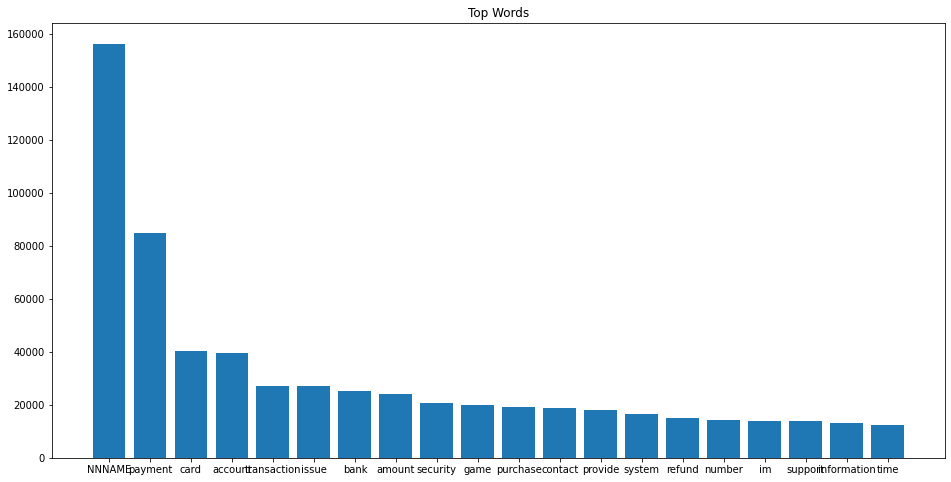

In [ ]:
#проанализируем популярные слова
from sklearn.feature_extraction.text import CountVectorizer

c_text = co.Counter(text_arrays)

w =[]
count_w = []


most_freq_words = []

for i in c_text.most_common(20):
    w.append(i[0])
    count_w.append(i[1])

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(w)), count_w)
ax.set_xticks(range(len(w)))
ax.set_xticklabels(w)
ax.set_title('Top Words')

In [ ]:
#посмотрим непопулярные слова мало ли там беда
pd.DataFrame.from_dict(dict(c_text) , orient = 'index').sort_values(by = 0).head(15)

#видно в непопулярных словах какой то треш, они явно бесполезны при создании нашей модели, идем верно

,0
ssj3,1
entirety,1
coluldnt,1
jack6saha,1
dakotaz,1
niets,1
gebeurt,1
wacht,1
out3032,1
workaroung,1


# стемминг
важной частью задач nlp является преобразование к первоначальной форме, т.к. мы сужаем область поиска для слов

In [ ]:
text_analizator_df['text_arr'] = text_analizator_df.new_sentence.str.split('\W+').tolist()

In [ ]:
from nltk.stem.porter import *
stemming = PorterStemmer()

def stem_list(row):
    my_list = row['text_arr']
    stemmed_list = [stemming.stem(word) for word in my_list]
    return (stemmed_list)

text_analizator_df['stem_arr'] = text_analizator_df.apply(stem_list, axis=1)


In [ ]:
text_arrays_analizator = text_analizator_df['stem_arr'].tolist()
text_arrays = []
for text in text_arrays_analizator:
    for word in text:
        text_arrays.append(word)


Text(0.5, 1.0, 'Top Words')

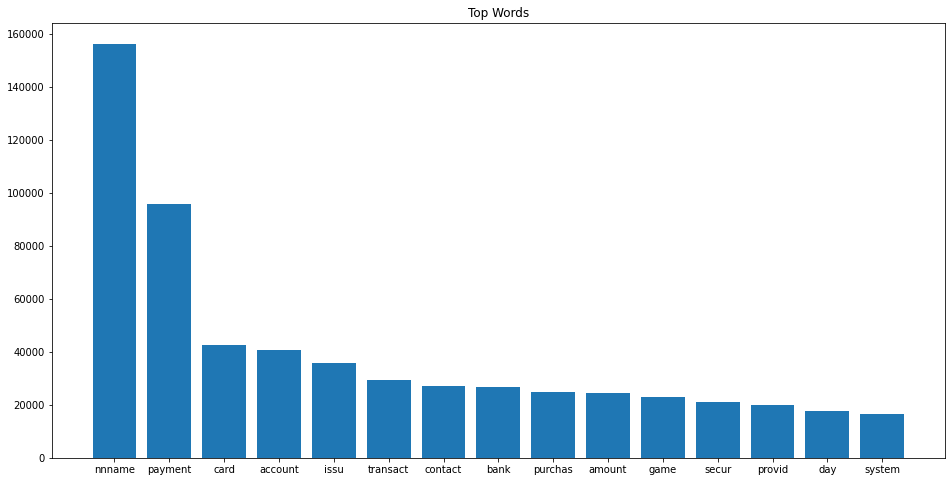

In [ ]:
#отлично видим что наши частовстречающиеся слова однородны
text_arrays = list(filter(None, text_arrays))
c_text = co.Counter(text_arrays)

w =[]
count_w = []


most_freq_words = []

for i in c_text.most_common(15):
    w.append(i[0])
    count_w.append(i[1])

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(w)), count_w)
ax.set_xticks(range(len(w)))
ax.set_xticklabels(w)
ax.set_title('Top Words')

In [ ]:
# мы хотим попробовать подход tf-idf над словами, для того, чтобы веса были равномерны - давайте выберем наиболее корректные слова
top_words = 1000
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(pd.DataFrame.from_dict(dict(c_text) , orient = 'index').sort_values(by = 0,ascending = False).head(top_words))

                                  0
nnname                       156222
payment                       95556
card                          42406
account                       40612
issu                          35931
transact                      29354
contact                       26988
bank                          26577
purchas                       24631
amount                        24332
game                          22749
secur                         21124
provid                        19963
day                           17471
system                        16649
refund                        15283
check                         14679
number                        14578
inform                        14292
minut                         14266
time                          14166
support                       13932
im                            13887
email                         12442
make                          12076
address                       12005
xsolla                      

In [ ]:
#оставим для модели топ  слов
final_words = pd.DataFrame.from_dict(dict(c_text) , orient = 'index').sort_values(by = 0 , ascending = False).head(top_words).index.values

In [ ]:
f = lambda x: ' '.join([item for item in x if item in final_words])
text_analizator_df['stem_text'] = text_analizator_df['stem_arr'].apply(f)

In [ ]:
# в итоге выделив основные главне слова, которые нам могут быть интересны потенциально
# получили new_sentence, можнте посмотреть как он отличается
print(f'old- {text_analizator_df.loc[0]["sentence"]}' )
print('\n')
print(f'new -{text_analizator_df.loc[0]["new_sentence"]}' )
print('\n')
print(f'stem -{text_analizator_df.loc[0]["stem_text"]}' )

old-  chat transcript visitor i am attempting to verify my card however the payment is not posting. all charges typically post immediately with my bank. sofia hello sofia please stand by online, as it may take some time to resolve the issue. ill provide you with an update in a few minutes. thank you for your patience. 


new -attempting verify card payment posting charges post bank NNNAME NNNAME stand online time resolve issue ill update minutes NNNAME 


stem -attempt verifi card payment post charg post bank nnname nnname stand onlin time resolv issu ill updat minut nnname


# сделаем теперь векторное представление

In [ ]:
#ну тут без особой магии
texts = df['message']
texts = text_analizator_df['sentence']
texts = text_analizator_df['stem_text']

vec = TfidfVectorizer(max_features=top_words)
tfidf_mat = vec.fit_transform(texts).toarray()
print(type(tfidf_mat),tfidf_mat.shape)
#на выход получаем матрицу заданной размерности

<class 'numpy.ndarray'> (36689, 1000)


# выравнивание классов

In [ ]:
train = pd.DataFrame(tfidf_mat)
train['category'] =  df['category']

target = 'category'
train_columns = list(set(train.columns) - set([target]))

train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,category
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,afs
1,0.0,0.0,0.0,0.0,0.0,0.215294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,other
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.232318,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,0.0,0.0,0.0,0.0,0.0,0.231512,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.208177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.110561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,afs


In [ ]:
train.dropna(inplace = True)

In [ ]:
#переводим в инты таргет
labels, levels = pd.factorize(train[target])
train['category_int'] = labels

target = 'category_int'

In [ ]:
train[(train['category_int'] == -1)]
train.category.unique()

array(['afs', 'other', 'ps'], dtype=object)

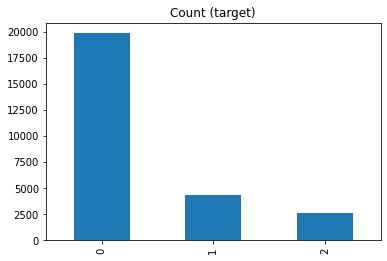

In [ ]:
train[target].value_counts().plot(kind='bar', title='Count (target)');

In [ ]:
#сделаем оверсемплинг

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()

X_ros, y_ros = ros.fit_sample(train[train_columns], train[target])

print(f'rate target detect fight in game {sum(y_ros) / X_ros.shape[0]}')

rate target detect fight in game 1.0


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_ros = pd.DataFrame(X_ros)
X_ros

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.215294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.231512,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.208177,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.110561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.161276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.444675,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59623,0.0,0.0,0.0,0.0,0.0,0.129320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.096904,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59624,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59625,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.320866,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59626,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.158875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_ros[target] = y_ros
train = X_ros[:]

# наконец переходим к модели

In [ ]:
#будем использовать LightGBM как основной фреймворк для построения модели
# попробуем?
import lightgbm as lgb

from hyperopt import hp
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

In [ ]:
#отложим выборку для финальной оценки

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train[train_columns]
                                                    , train[target] 
                                                    , test_size=0.2
                                                    , random_state=42 
                                                    , stratify = train[target] 
                                                   )

print(f'Train set: {x_train.shape[0]} size , {sum(y_train) / x_train.shape[0]} target size')
print(f'Test set: {x_test.shape[0]} size , {sum(y_test) / x_test.shape[0]} target size')


Train set: 47702 size , 0.9999790365183849 target size
Test set: 11926 size , 1.0000838504108671 target size


In [ ]:
# from sklearn.neural_network import MLPClassifier
# clf = MLPClassifier(random_state=1, max_iter=300).fit(x_train[train_columns], y_train)

In [ ]:
# predicts_prob_1 = clf.predict_proba(x_test)

In [ ]:
# prediction_class_1=[]
# for x in predicts_prob_1:
#     prediction_class_1.append(np.argmax(x))

In [ ]:
# clf.score(x_test, y_test)

0.8811001173905753

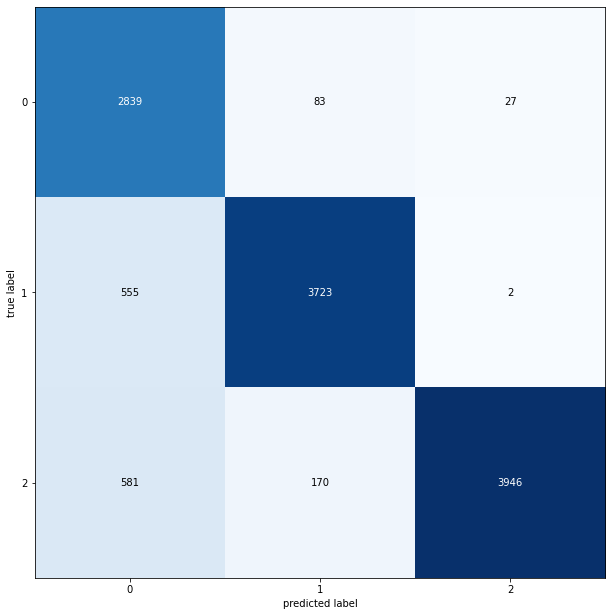

In [ ]:
# cm_1 = confusion_matrix(prediction_class_1, y_test)

# fig_1, ax_1 = plot_confusion_matrix(conf_mat=cm_1)

# ig_1 = matplotlib.pyplot.gcf()
# fig_1.set_size_inches(18.5, 10.5)
# plt.show()

In [ ]:
# accuracy_score(prediction_class_1, y_test)

0.8811001173905753

In [ ]:
# print(classification_report(y_test, prediction_class_1))

              precision    recall  f1-score   support

           0       0.96      0.71      0.82      3975
           1       0.87      0.94      0.90      3976
           2       0.84      0.99      0.91      3975

    accuracy                           0.88     11926
   macro avg       0.89      0.88      0.88     11926
weighted avg       0.89      0.88      0.88     11926



In [ ]:
# clf.predict(vec.transform(['payment hell i i am paypal']))

array([1])

In [ ]:
lgb_data_train = lgb.Dataset(x_train[train_columns], 
                             y_train, 
                             free_raw_data=False
                            )

#инициируем целевые параметры для первого приближения модели
params = {
    'objective':'multiclassova', 
    'metric': 'multi_logloss',
    "num_class" : 3,
    'learning_rate': 0.1, 
    'random_state':202008,
    'subsample':0.33,
}


In [ ]:
optimal_boost = 1000
lgb_data_train = lgb.Dataset(x_train[train_columns], 
                             y_train, 
                             free_raw_data=False
                            )


model = lgb.train(params, lgb_data_train, num_boost_round=optimal_boost  )

In [ ]:
predicts_prob = model.predict(x_test)
prediction_class = []

for x in predicts_prob:
    prediction_class.append(np.argmax(x))

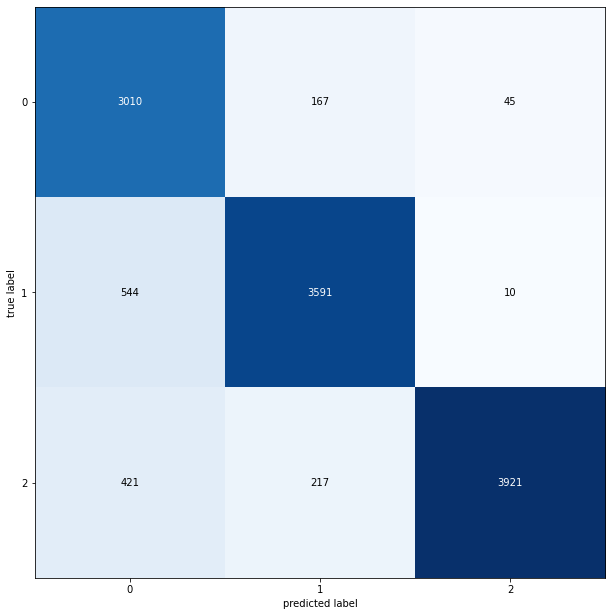

In [ ]:
import matplotlib.pyplot as plt
import matplotlib

from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

cm = confusion_matrix(prediction_class, y_test)

fig, ax = plot_confusion_matrix(conf_mat=cm)

ig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(prediction_class, y_test)

0.8822740231427134

In [ ]:
print(classification_report(y_test, prediction_class))

              precision    recall  f1-score   support

           0       0.93      0.76      0.84      3975
           1       0.87      0.90      0.88      3975
           2       0.86      0.99      0.92      3976

    accuracy                           0.88     11926
   macro avg       0.89      0.88      0.88     11926
weighted avg       0.89      0.88      0.88     11926



In [ ]:
model.save_model('lgbm_model.txt')

In [ ]:
import pickle 
pickle.dump(vec, open("tfidf.pickle", "wb"))